In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ingest

https://www.kaggle.com/kondla/carinsurance

In [381]:
df_X = pd.read_csv('carInsurance_train.csv', index_col='Id')
df_T = pd.read_csv('carInsurance_test.csv', index_col='Id')
target_col = 'CarInsurance'

In [382]:
X

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts
Id,,,,,,,,,
1,32,0,1218,1,0,28,2,-1,0
2,32,0,1156,1,0,26,5,-1,0
3,29,0,637,1,0,3,1,119,1
4,25,0,373,1,0,11,2,-1,0
5,30,0,2694,0,0,3,1,-1,0
...,...,...,...,...,...,...,...,...,...
3996,28,0,0,1,0,25,1,40,2
3997,49,0,124,1,1,29,19,-1,0
3998,27,0,-400,0,1,8,1,-1,0


# Data cleaning

In [383]:
X = df_X.select_dtypes('number')

In [384]:
X.isnull().values.any()

False

In [385]:
y = X[target_col]
X = X.drop([target_col], axis=1)

In [386]:
T = df_T.select_dtypes('number')
T = T.drop([target_col], axis=1)
T.isnull().values.any()

False

# Visualization

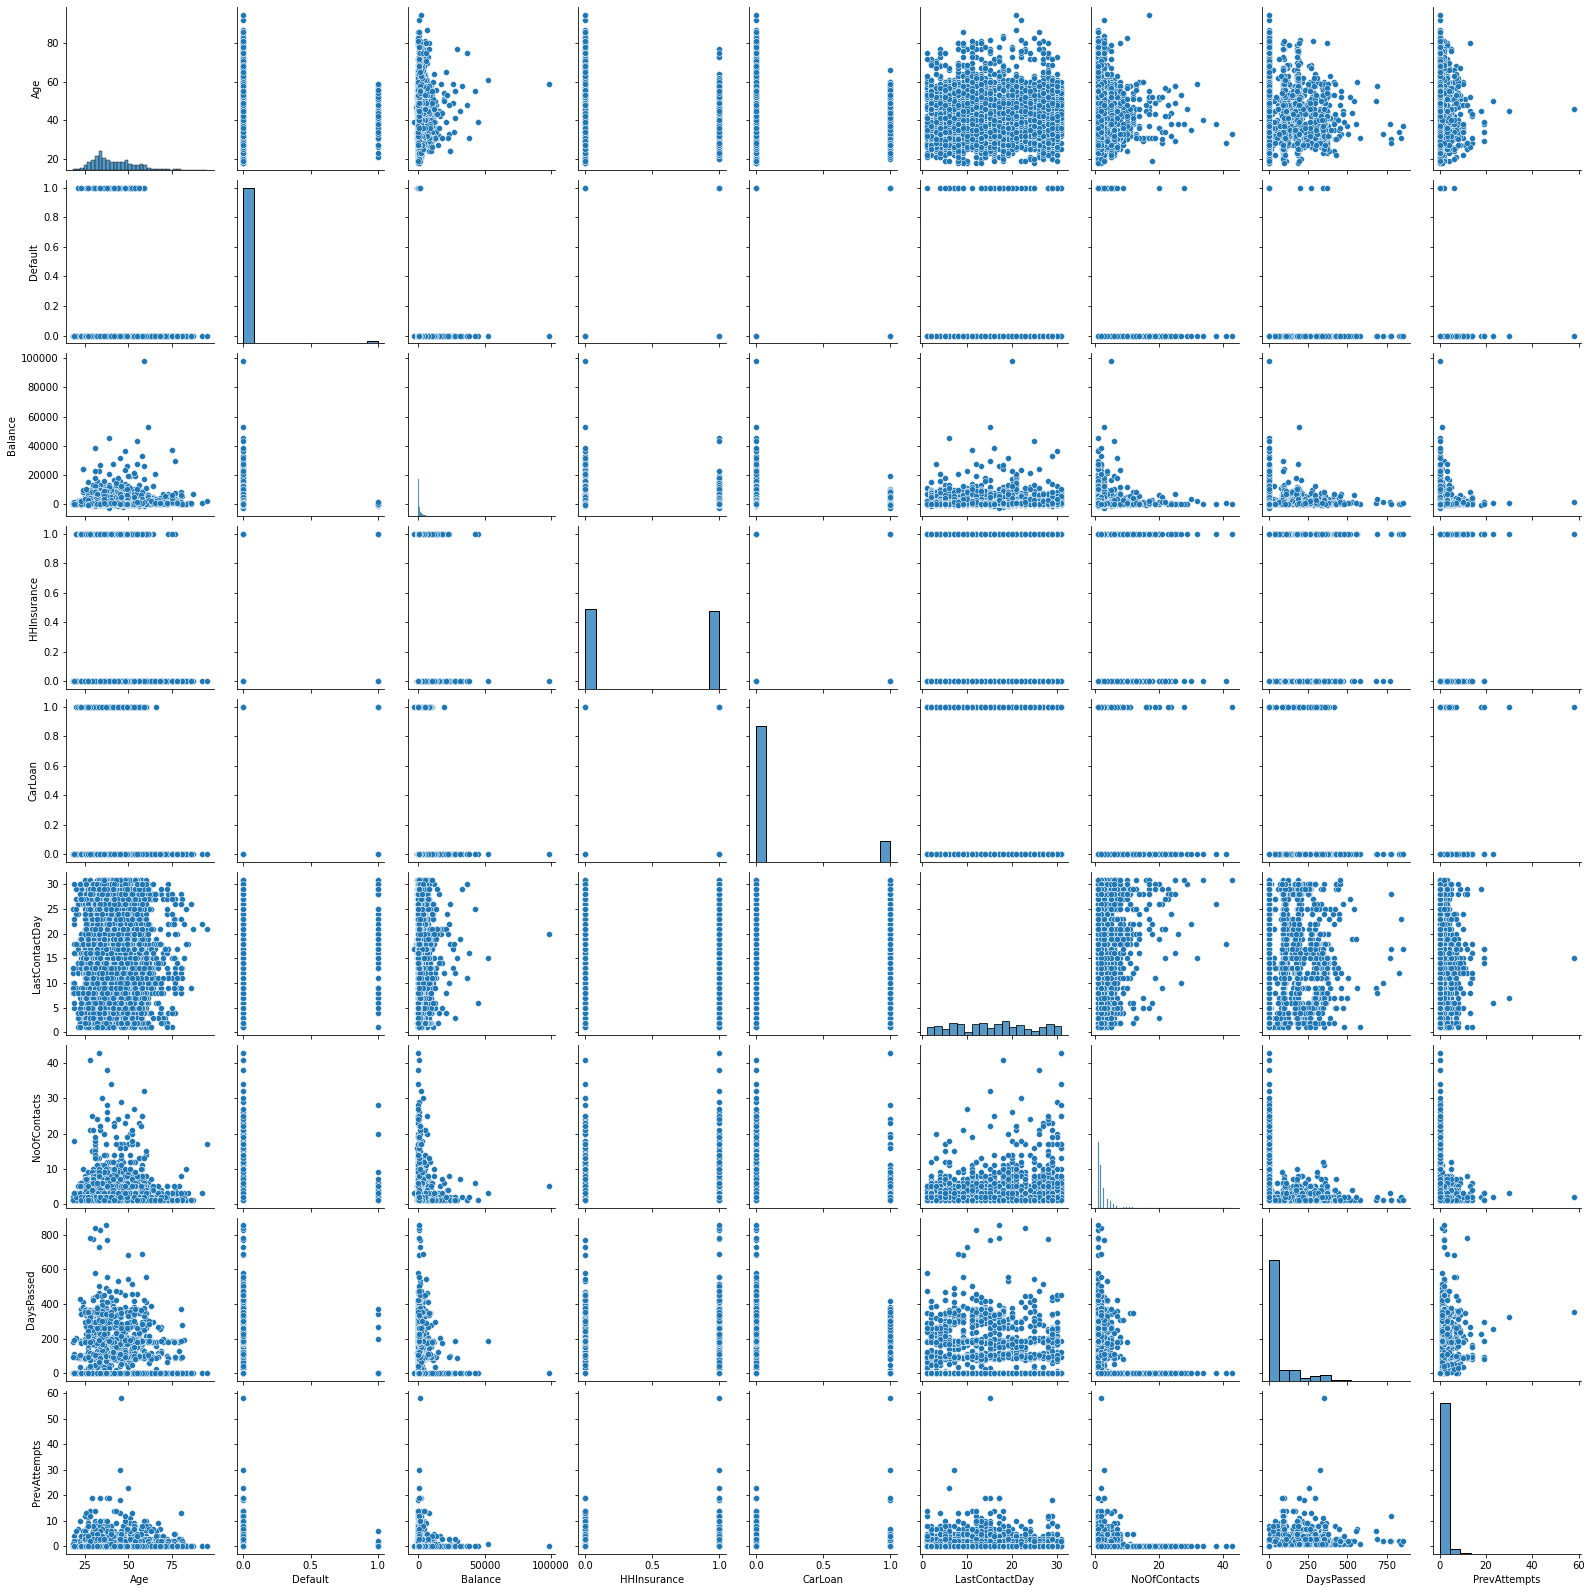

In [396]:
import seaborn as sns
sns.pairplot(X)

In [388]:
df_X.corr()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
Age,1.000000,0.003720,0.094330,-0.183861,-0.012383,0.013762,0.028561,-0.016685,-0.002503,0.039158
Default,0.003720,1.000000,-0.054045,-0.014974,0.124936,0.027350,0.029884,-0.033388,-0.031812,-0.039506
Balance,0.094330,-0.054045,1.000000,-0.072401,-0.081684,0.015519,-0.005201,-0.002107,0.001323,0.041561
HHInsurance,-0.183861,-0.014974,-0.072401,1.000000,0.088145,-0.024075,-0.005858,0.081246,0.026900,-0.203419
CarLoan,-0.012383,0.124936,-0.081684,0.088145,1.000000,0.011299,0.020652,-0.041678,-0.020796,-0.092131
LastContactDay,0.013762,0.027350,0.015519,-0.024075,0.011299,1.000000,0.144303,-0.073521,-0.072977,-0.061271
NoOfContacts,0.028561,0.029884,-0.005201,-0.005858,0.020652,0.144303,1.000000,-0.100634,-0.056527,-0.114884
DaysPassed,-0.016685,-0.033388,-0.002107,0.081246,-0.041678,-0.073521,-0.100634,1.000000,0.496507,0.138943
PrevAttempts,-0.002503,-0.031812,0.001323,0.026900,-0.020796,-0.072977,-0.056527,0.496507,1.000000,0.148763
CarInsurance,0.039158,-0.039506,0.041561,-0.203419,-0.092131,-0.061271,-0.114884,0.138943,0.148763,1.000000


# Modeling

In [389]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def best_model_f1_score(X, y, estimators):
    return best_model(X, y, estimators, "f1")

def best_model(X, y, estimators, scoring):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)
    best_estimator_ = None
    best_score_ = 0
    for estimator in estimators:
        clf_gs = GridSearchCV(estimator["classifier"],
                          param_grid=estimator["params"],
                          scoring=scoring)
        clf_gs.fit(X_train, y_train);
        if clf_gs.best_score_ > best_score_:
            best_estimator_ = clf_gs.best_estimator_
            best_score_ = clf_gs.best_score_
    return best_estimator_, best_score_, 

def scoring_report(X, y, estimator):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)
    print(classification_report(y_test, estimator.predict(X_test)))

In [390]:
estimators = [
    {"classifier": KNeighborsClassifier(), "params": {'n_neighbors': np.arange(1,50)}}, 
    {"classifier": DecisionTreeClassifier(), "params": {'max_depth': np.arange(3,10), 'min_samples_leaf': np.arange(10, 50, 5)}}
]

In [391]:
best_estimator_, best_score_ = best_model_f1_score(X, y, estimators)

In [392]:
best_estimator_, best_score_

(DecisionTreeClassifier(max_depth=9, min_samples_leaf=35), 0.5567218646473175)

# Evaluation

In [393]:
scoring_report(X, y, best_estimator_)

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       464
           1       0.65      0.43      0.51       336

    accuracy                           0.66       800
   macro avg       0.66      0.63      0.63       800
weighted avg       0.66      0.66      0.64       800



In [397]:
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)
f1_score(y_test, best_estimator_.predict(X_test), average='weighted')

0.6449553921070796

# Prediction

In [395]:
T[best_estimator_.predict(T) == 1]

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts
Id,,,,,,,,,
4006,28,0,12956,1,0,2,1,399,3
4012,38,0,4383,0,0,4,4,-1,0
4019,43,0,10072,0,0,12,1,77,5
4021,28,0,6332,1,0,7,1,343,4
4022,68,0,0,0,0,22,1,-1,0
...,...,...,...,...,...,...,...,...,...
4974,83,0,5944,0,0,30,3,-1,0
4986,25,0,2975,0,0,2,2,-1,0
4997,52,0,2635,0,0,6,1,108,8
